# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [5]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [11]:
# Fetch current BTC price
btc = requests.get(btc_url, headers={'Accept': 'application/json'})
btc_data = btc.json()
btc_data

# Assign variables to BTC data
btc_name = btc.json()['data']['1']['name']
btc_price = btc.json()['data']['1']['quotes']['USD']['price']
btc_description = btc.json()['data']['1']['quotes']['USD']
btc_description
#print(response.json())


# Fetch current ETH price
eth = requests.get(eth_url, headers={'Accept': 'application/json'})
eth_data = eth.json()
eth_data

# Assign variables to ETH data
eth_name = eth.json()['data']['1027']['name']
eth_price = eth.json()['data']['1027']['quotes']['USD']['price']
eth_description = eth.json()['data']['1027']
btc_description


# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $12573.08
The current value of your 5.3 ETH is $1826.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
my_agg = 200
my_spy = 50

shares_data = {
    "shares":[200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares


,shares
AGG,200
SPY,50


In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key, 
    api_version='v2'
)

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2020-09-18", tz="America/New_York").isoformat()

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
print(df_portfolio.head())

# Get current closing prices for SPY and AGG # Pick AGG and SPY close prices
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

                              AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2020-09-18 00:00:00-04:00  118.39  118.44  118.18  118.24  4548578  335.37   

                                                             
                             high     low   close    volume  
time                                                         
2020-09-18 00:00:00-04:00  335.49  327.97  330.69  88780313  
Current AGG closing price: $118.24
Current SPY closing price: $330.69


In [15]:
# Compute the current value of shares
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16534.50
The current value of your 200 AGG shares is $23648.00


### Savings Health Analysis

In [23]:
# Create savings DataFrame
my_shares_value = my_spy_value + my_agg_value
my_crypto_value = my_btc_value + my_eth_value

value_data = {
    "Shares": [my_shares_value],
    "Crypto": [my_crypto_value]
}

# Create a DataFrame with the current value of shares

df_savings = pd.DataFrame({'': ['BTC', 'ETH', 'SPY', 'AGG'],'# of Shares': [my_btc, my_eth, my_spy, my_agg],'Value': [my_btc_value, my_eth_value, my_spy_value, my_agg_value]}, index=['BTC', 'ETH', 'SPY', 'AGG'])
df_savings.set_index('')

# Display savings DataFrame
display(df_savings)

,,# of Shares,Value
BTC,BTC,1.2,12573.084
ETH,ETH,5.3,1826.009
SPY,SPY,50.0,16534.500
AGG,AGG,200.0,23648.000


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='Value'>

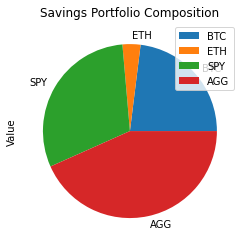

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y="Value", title="Savings Portfolio Composition")

In [43]:
# Plot savings by class on the pie chart

df_savings_class = pd.DataFrame({'': ['Crypto', 'Shares'], 'Amount': [my_crypto_value, my_shares_value]}, index=['Crypto', 'Shares'])
df_savings_class.set_index('')

,Amount
,
Crypto,14399.093
Shares,40182.500


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='Amount'>

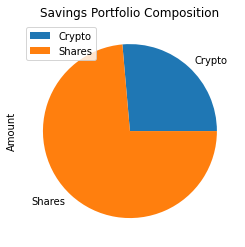

In [44]:
# Plot savings by class  pie chart
df_savings_class.plot.pie(y="Amount", title="Savings Portfolio Composition")

In [45]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round(my_shares_value + my_crypto_value, 2)

print(f'Emergency fund is equal to ${emergency_fund}.')
print(f'Your total savings are equal to ${total_savings}.')

# Validate saving health
if total_savings > emergency_fund:
    print('You have enough money in emergency fund.')
else:
    print(f'You have to save for an emergency fund. You need ${emergency_fund - total_savings} more to meet your emergency fund target.')


Emergency fund is equal to $36000.
Your total savings are equal to $54581.59.
You have enough money in emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-09-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-09-18', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336  195.70   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683  196.44   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125  193.88   
2015-09-23 00:00:00-04:00  109.29  109.29  109.10  109.170  1390021  194.11   
2015-09-24 00:00:00-04:00  109.49  109.51  109.24  109.299  2541416  192.15   

                                                              
                             high     low   close     volume  
time                                                          
2015-09-18 00:00:00-04:00  197.56  194.96  195.42  145482216  
2015-09-21 00:00:00-04:00  197.68  195.21  196.46   82723303  
2015-09-22 00:00:00-04:00  194.46  192.56  193.88  105035035  
2015-09-23 00:00:00-04:00  194.67  192.91  193.57   72992362  
2015-09-24 00:00:00-04:00  193.45  190.56  192.93  131840231

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125   
2015-09-23 00:00:00-04:00  109.29  109.29  109.10  109.170  1390021   
2015-09-24 00:00:00-04:00  109.49  109.51  109.24  109.299  2541416   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-09-18 00:00:00-04:00          NaN  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   
2015-09-23 00:00:00-04:00    -0.000915  194.11  194.67  192.91  193.57   
2015-09-24 00:00:00-04:00     0.001182  192.15  193.45  190.56  192.93   

                                                   
                              volume daily_return  
time                                               
2015-09-18 00:00:00-04:00  145482216          NaN  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132  
2015-09-23 00:00:00-04:00   72992362    -0.001599  
2015-09-24 00:00:00-04:00  131840231    -0.003306

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996870,0.997821,1.000139,0.996002,0.995308,0.996728,1.002846,0.994065,0.993574,1.002297,...,0.998537,1.001803,0.999176,0.999854,1.000474,1.001826,0.998581,0.999656,1.003159,1.000659
2,0.999728,0.994876,1.002202,1.001136,0.994891,1.000897,0.999981,0.994010,0.997005,1.007325,...,0.998243,0.999795,0.998326,1.002050,1.002887,0.997244,1.003043,1.000787,1.005768,0.998795
3,0.998074,0.993740,1.004249,1.000834,0.996562,0.999938,0.995591,0.995583,0.995482,1.010228,...,0.995642,1.004478,1.000798,1.001713,1.001530,0.995605,1.005935,1.000360,1.004500,0.996386
4,0.999186,0.995272,1.004819,1.002131,1.001612,0.997213,0.992487,0.996348,0.992402,1.010512,...,0.991841,0.998375,0.999198,0.998159,1.001644,0.995062,1.006880,0.998473,0.999051,0.995339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.255796,3.068617,3.202797,2.369261,4.761818,3.800126,2.480189,4.111177,1.754943,1.908850,...,2.619067,3.527279,3.209207,3.058654,3.307264,3.217135,1.442739,2.646226,1.991601,2.822265
7557,3.251875,3.055390,3.199130,2.377392,4.747404,3.808957,2.473637,4.116430,1.755264,1.916462,...,2.621441,3.509287,3.209368,3.059420,3.307830,3.215278,1.446429,2.648593,1.992576,2.834421
7558,3.260039,3.055362,3.207970,2.390504,4.744044,3.824884,2.457765,4.116799,1.764893,1.921961,...,2.613890,3.522125,3.215384,3.055108,3.311889,3.221153,1.446781,2.635204,1.993420,2.851841
7559,3.274962,3.038259,3.202703,2.391925,4.756272,3.814677,2.460881,4.117493,1.768110,1.929580,...,2.613992,3.512421,3.207616,3.066889,3.329252,3.216141,1.452044,2.631586,1.990525,2.859050


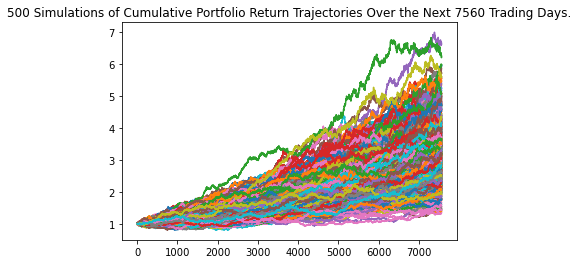

In [23]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyears_sim_plot.png", bbox_inches="tight")

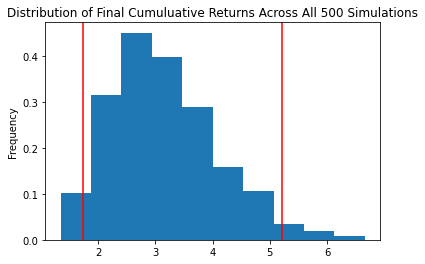

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyears.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyears_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyears.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              3.156205
std               0.924421
min               1.342287
25%               2.464836
50%               3.051364
75%               3.677694
max               6.660751
95% CI Lower      1.741486
95% CI Upper      5.215503
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34829.72 and $104310.06


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $52244.58 and $156465.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997700,1.001458,0.998266,1.002626,1.001979,1.002582,1.002428,0.994977,0.996361,1.001316,...,0.996612,1.006082,1.001075,0.996880,0.999472,1.000679,1.006737,1.005727,1.001003,1.006707
2,0.993446,0.995441,0.995240,0.999697,1.002369,1.005999,0.998434,0.990575,0.991612,1.003743,...,0.995266,1.006924,0.999109,0.995379,1.001343,0.999919,1.006979,1.004524,1.001106,1.007953
3,0.991720,1.002661,0.995303,1.002737,1.003374,1.011867,0.994280,0.992526,0.990436,1.001287,...,0.993176,1.010235,1.002515,0.994730,1.002239,1.000998,1.012006,1.008174,1.008739,1.007032
4,0.991578,1.009477,0.994822,0.999623,1.005022,1.009782,0.997840,0.991889,0.991048,0.998982,...,0.993142,1.012896,1.006465,0.991349,1.006887,0.995709,1.017417,1.006078,1.006430,1.015583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.131242,1.227335,1.100205,1.203917,1.240252,1.100524,1.312361,1.293268,1.060505,0.943190,...,1.239045,0.999323,1.020781,1.151270,1.112915,1.113938,1.175697,1.175897,1.072857,1.295210
1257,1.131154,1.227083,1.102412,1.202455,1.246317,1.101356,1.310011,1.286048,1.053421,0.943623,...,1.234936,0.997101,1.019618,1.147152,1.118371,1.113352,1.179012,1.174098,1.075834,1.306637
1258,1.134711,1.224948,1.105065,1.203473,1.244071,1.105772,1.310683,1.288662,1.056917,0.940595,...,1.231767,1.001270,1.019048,1.147812,1.110299,1.115620,1.175727,1.174937,1.076372,1.311602
1259,1.140317,1.218027,1.097788,1.199943,1.246774,1.112537,1.302663,1.292803,1.052077,0.942152,...,1.230491,1.001706,1.021797,1.150304,1.115999,1.117791,1.171019,1.173411,1.074691,1.320369


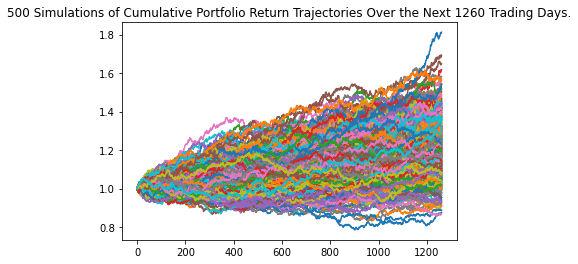

In [38]:
# Plot simulation outcomes
line_plot = MC_fiveyears.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyears_sim_plot.png", bbox_inches="tight")

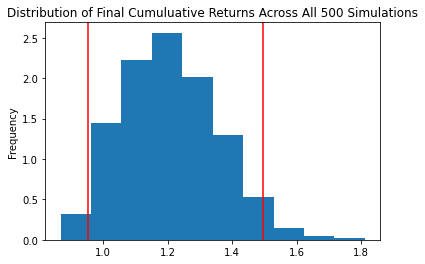

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyears.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyears_dist_plot.png',bbox_inches='tight')

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.206591
std               0.148353
min               0.867472
25%               1.096741
50%               1.198964
75%               1.304574
max               1.812076
95% CI Lower      0.952689
95% CI Upper      1.494994
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $104489.15 and $312930.18


### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [43]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997545,0.995937,1.002353,0.996140,0.996804,0.997772,0.996939,0.999060,1.000362,0.999263,...,0.999162,1.002091,1.006490,0.999456,0.999306,1.003565,0.999524,0.994796,0.996428,1.000873
2,0.998242,0.992284,1.005865,0.991680,0.994636,1.004613,0.996308,0.998501,1.002860,1.001697,...,1.001649,1.004289,1.006057,0.998106,0.996294,1.002126,1.003836,0.990945,0.997783,1.003568
3,0.994995,0.995588,1.004063,0.993131,0.989848,1.007825,0.997357,0.996318,1.005470,1.004331,...,1.002455,1.001658,1.004875,0.996998,0.999532,0.998589,0.998711,0.993043,1.002386,1.005767
4,0.987654,0.998262,1.000967,0.989703,0.991513,1.010194,0.991670,0.995578,1.011024,1.003775,...,1.004537,0.999166,1.003745,0.999656,1.003708,1.000756,0.997884,0.994946,1.008674,1.009592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.428628,1.931863,1.748641,1.746897,1.190213,1.283977,1.228647,2.262108,1.761330,1.525446,...,2.242486,2.037946,1.307177,1.409013,1.377115,1.765539,1.208476,1.616726,1.567386,1.508373
2517,1.435333,1.938726,1.751639,1.735420,1.190359,1.284114,1.229055,2.255674,1.755558,1.521807,...,2.235510,2.037197,1.305931,1.409494,1.372678,1.754648,1.213258,1.621123,1.565436,1.515364
2518,1.436057,1.938251,1.755545,1.732261,1.189726,1.283191,1.227815,2.264994,1.772724,1.525321,...,2.233663,2.029121,1.303692,1.407791,1.371379,1.749350,1.206250,1.630653,1.564300,1.511380
2519,1.440355,1.930757,1.748756,1.738595,1.190520,1.285352,1.230601,2.272570,1.769858,1.529874,...,2.230107,2.031427,1.299670,1.405673,1.375254,1.755844,1.210778,1.629736,1.570264,1.510946


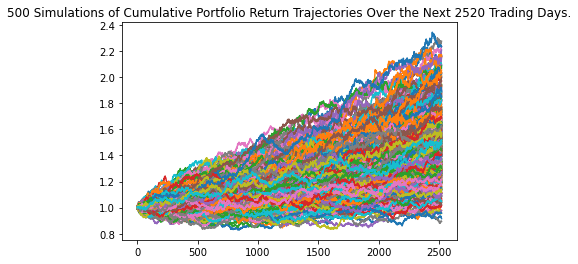

In [44]:
# Plot simulation outcomes
line_plot = MC_tenyears.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_tenyears_sim_plot.png", bbox_inches="tight")

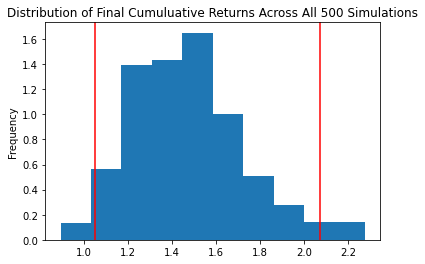

In [45]:
# Plot probability distribution and confidence interval
dist_plot = MC_tenyears.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_tenyears_dist_plot.png',bbox_inches='tight')

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.472002
std               0.250244
min               0.893256
25%               1.288611
50%               1.454825
75%               1.612574
max               2.274842
95% CI Lower      1.050947
95% CI Upper      2.070104
Name: 2520, dtype: float64


In [48]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $104489.15 and $312930.18
